Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\gdp-and-internet-usage-aaron-hollinger\data\gdp_percapita.csv")

In [3]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>

4. Answer: There are 7662 rows and 4 columns

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

4. Answer: One object, one int64 and two float columns

Question: Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [6]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [7]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

7 - Answer: 202 countries have data for all years. Countries missing data: Djibouti, Somalia,  Turks and Caicos Islands, Sint Maarten (Dutch part), Kosovo. Observations have increased over time, but there was a dropoff in 2022.

In [115]:
gdp_df_count_by_year = gdp_df.groupby(['Year']).agg({'Year':'count', 'GDP_Per_Capita':'count'})

In [116]:
gdp_df_count_by_year

,Year,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


In [103]:
gdp_df_count = gdp_df.groupby(['Country']).agg({'Year':'count', 'GDP_Per_Capita':'count'})

In [104]:
gdp_df_count

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [114]:
gdp_df_count.sort_values(by = 'Year')

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [109]:
gdp_df_all_data = gdp_df_count.loc[(gdp_df_count['Year'] == 33) & (gdp_df_count['GDP_Per_Capita'] == 33)]

In [110]:
gdp_df_all_data

,Year,GDP_Per_Capita
Country,,
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
Angola,33,33
...,...,...
Vanuatu,33,33
Viet Nam,33,33
World,33,33


In [13]:
gdp_df.groupby(['Country']).count()

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [14]:
all_data_final = gdp_df.groupby('Country').apply(lambda x: (x['Year'] == 33).max())

In [15]:
all_data_final

Country
Afghanistan                    False
Africa Eastern and Southern    False
Africa Western and Central     False
Albania                        False
Algeria                        False
                               ...  
Viet Nam                       False
West Bank and Gaza             False
World                          False
Zambia                         False
Zimbabwe                       False
Length: 242, dtype: bool

In [16]:
gdp_df.groupby(['Year']).count()

,Country,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

8. Answer: 

In [17]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]

In [18]:
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <a list of 10 Patch objects>)

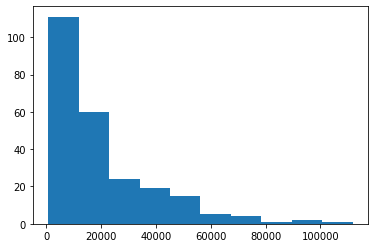

In [19]:
plt.hist(gdp_2020.GDP_Per_Capita)

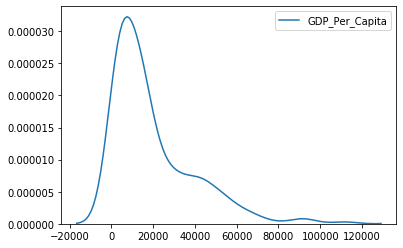

In [20]:
sns.kdeplot(gdp_2020.GDP_Per_Capita)

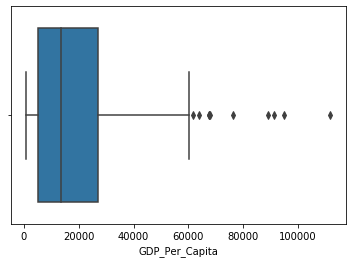

In [21]:
sns.boxplot(gdp_2020.GDP_Per_Capita)

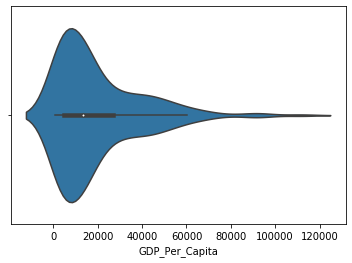

In [22]:
sns.violinplot(gdp_2020.GDP_Per_Capita)

9. What was the median GDP per capita value in 2020?

In [23]:
gdp_2020.agg('median')

Year               2020.000000
GDP_Per_Capita    13357.997573
dtype: float64

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [24]:
gdp_subset = gdp_df.loc[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020)]


In [25]:
gdp_subset

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


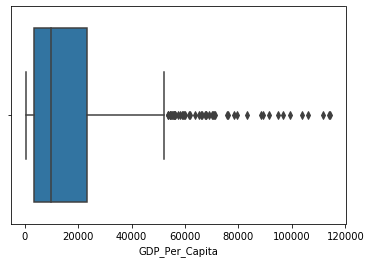

In [26]:
sns.boxplot(gdp_subset.GDP_Per_Capita)

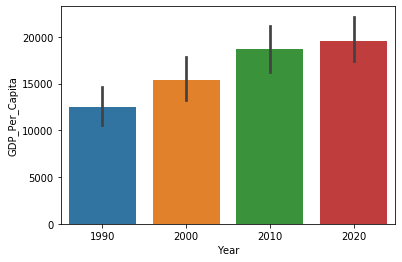

In [27]:
sns.barplot(gdp_subset.Year, gdp_subset.GDP_Per_Capita)

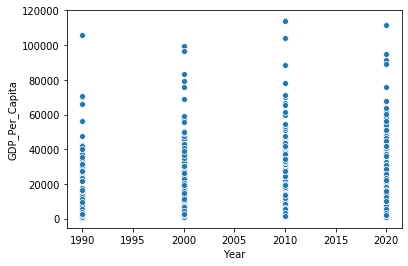

In [28]:
sns.scatterplot(gdp_subset.Year, gdp_subset.GDP_Per_Capita)

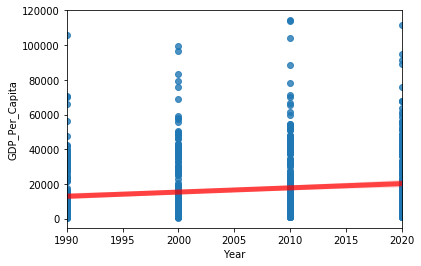

In [29]:
sns.regplot(x=gdp_subset["Year"], y=gdp_subset["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

11 - Answer: United Arab Emirates

In [30]:
gdp100 = gdp_df.loc[gdp_df['GDP_Per_Capita'] > 100000]


In [31]:
gdp100.sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

12 - Answer: Luxembourg

In [32]:
gdp_2020.groupby('GDP_Per_Capita').max()

,Country,Year
GDP_Per_Capita,,
711.355263,Burundi,2020
847.765012,Central African Republic,2020
1044.071214,Dem. Rep. Congo,2020
1127.418534,Somalia,2020
1214.546556,Niger,2020
...,...,...
76117.804744,Bermuda,2020
89019.069857,Qatar,2020
91356.855054,Ireland,2020


In [33]:
gdp_luxembourg = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']

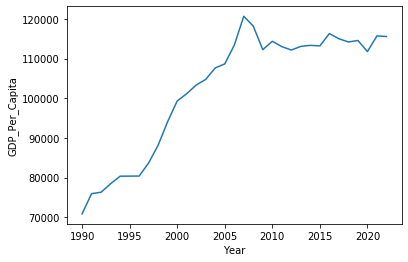

In [34]:
sns.lineplot(gdp_luxembourg.Year, gdp_luxembourg.GDP_Per_Capita)

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

13 - Answer: Burundi

In [35]:
gdp_burundi = gdp_df.loc[gdp_df['Country'] == 'Burundi']

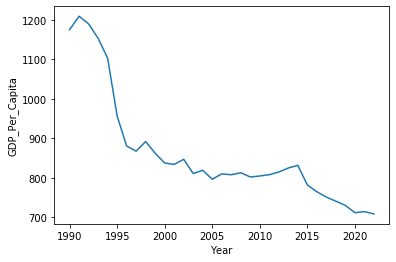

In [36]:
sns.lineplot(gdp_burundi.Year, gdp_burundi.GDP_Per_Capita)

In [37]:
internet_df = pd.read_csv(r'C:\Users\AaronH\Documents\nss_data_analytics\Projects\gdp-and-internet-usage-aaron-hollinger\data\internet_use.csv', nrows=4495)

In [38]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [39]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [40]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [41]:
internet_df = internet_df[['Country or Area','Year', 'Value']]

In [42]:
internet_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'}, inplace=True)

In [43]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


In [44]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [45]:
internet_df_year = internet_df.groupby('Year')[['Country','Internet_Users_Pct']].count()

In [46]:
internet_df_year

,Country,Internet_Users_Pct
Year,,
1960,7,7
1965,7,7
1970,7,7
1975,7,7
1976,7,7
1977,7,7
1978,7,7
1979,7,7
1980,7,7


16. Look at the number of observations in this dataset per year. What do you notice?

16 - Answer: Number of observations increased significantly in 1990, dropped a lot 1991 to 1994, and then started increasing again back to 1990 levels.

17. Look at the number of observations in this dataset per year. What do you notice?

17 - Answer: 1990

In [47]:
internet_df_use = internet_df.groupby('Year')['Internet_Users_Pct'].sum()

In [48]:
internet_df_use

Year
1960       0.000000
1965       0.000000
1970       0.000000
1975       0.000000
1976       0.000000
1977       0.000000
1978       0.000000
1979       0.000000
1980       0.000000
1981       0.000000
1982       0.000000
1983       0.000000
1984       0.000000
1985       0.000000
1986       0.000000
1987       0.000000
1988       0.000000
1989       0.000000
1990       5.032933
1991      10.931876
1992      19.951850
1993      30.144702
1994      60.571026
1995     131.726726
1996     253.150223
1997     454.897179
1998     750.253424
1999    1172.587525
2000    1768.346984
2001    2198.771961
2002    2813.872118
2003    3250.897681
2004    3794.284115
2005    4278.601987
2006    4783.780564
2007    5290.186501
2008    5814.472583
2009    6338.399306
2010    6959.455800
2011    7779.505598
2012    8191.847053
2013    8654.211824
2014    9140.469980
Name: Internet_Users_Pct, dtype: float64

18. How does the distribution of internet users percent differ for 2000 and 2014?

18 - Answer: Distribution is heavily skewed towards lower levels of internet use in 2000, much more evenly distributed in 2014.

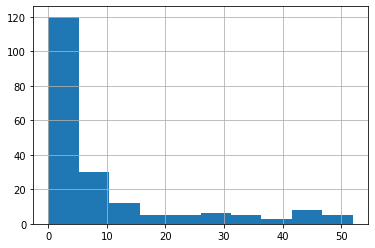

In [49]:
internet_df[internet_df["Year"]==2000]["Internet_Users_Pct"].hist()
plt.show()

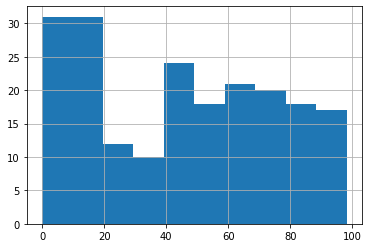

In [50]:
internet_df[internet_df["Year"]==2014]["Internet_Users_Pct"].hist()
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [51]:
internet_2014 = internet_df[internet_df['Year']==2014]

In [52]:
internet_2014

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
15,Albania,2014,60.10
36,Algeria,2014,18.09
59,Andorra,2014,95.90
78,Angola,2014,21.26
...,...,...,...
4389,Viet Nam,2014,48.31
4409,Virgin Islands (U.S.),2014,50.07
4431,Yemen,2014,22.55
4451,Zambia,2014,17.34


19. For how many countries was the percentage of internet users below 5% in 2014?

19 - Answer: 16

In [53]:
internet_2014[internet_2014["Internet_Users_Pct"] < 5.0].count() 


Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

20. Merge the two DataFrames to one

In [54]:
gdp_and_internet_use = pd.concat([internet_df, gdp_df], axis=0)

In [66]:
gdp_and_internet_use_merged = pd.merge(internet_df, gdp_df, on = 'Country')

In [55]:
gdp_and_internet_use = gdp_and_internet_use

In [56]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [57]:
three_largest = gdp_and_internet_use_2014.nlargest(3, ['Internet_Users_Pct']) 

21. Find the three countries with the highest internet users percentage in 2014. 

In [58]:
three_largest

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1866,Iceland,2014,98.16,NaN
415,Bermuda,2014,96.80,NaN
3016,Norway,2014,96.30,NaN


In [59]:
three_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway'])]

In [60]:
three_countries

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
415,Bermuda,2014,96.800000,NaN
416,Bermuda,2013,95.300000,NaN
417,Bermuda,2012,91.299305,NaN
418,Bermuda,2011,88.336000,NaN
419,Bermuda,2010,84.210000,NaN
...,...,...,...,...
5232,Norway,1994,NaN,47728.440232
5233,Norway,1993,NaN,45691.162079
5234,Norway,1992,NaN,44692.360963
5235,Norway,1991,NaN,43399.755863


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

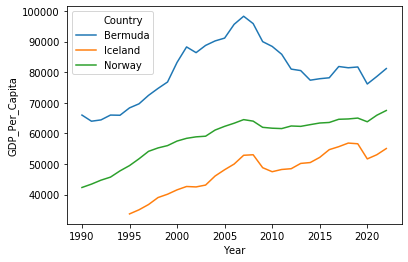

In [61]:
sns.lineplot(x = "Year", y = "GDP_Per_Capita", hue = 'Country', data=three_countries)
plt.show()

In [63]:
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.39,NaN
15,Albania,2014,60.10,NaN
36,Algeria,2014,18.09,NaN
59,Andorra,2014,95.90,NaN
78,Angola,2014,21.26,NaN
...,...,...,...,...
7509,Viet Nam,2014,NaN,7641.909252
7542,West Bank and Gaza,2014,NaN,5967.073437
7571,World,2014,NaN,15120.730322
7604,Zambia,2014,NaN,3375.941270


In [67]:
gdp_and_internet_use_merged

,Country,Year_x,Internet_Users_Pct,Year_y,GDP_Per_Capita
0,Afghanistan,2014,6.39,2021,1517.016266
1,Afghanistan,2014,6.39,2020,1968.341002
2,Afghanistan,2014,6.39,2019,2079.921861
3,Afghanistan,2014,6.39,2018,2060.698973
4,Afghanistan,2014,6.39,2017,2096.093111
...,...,...,...,...,...
115789,Zimbabwe,1990,0.00,1994,2670.106615
115790,Zimbabwe,1990,0.00,1993,2458.783255
115791,Zimbabwe,1990,0.00,1992,2468.278257
115792,Zimbabwe,1990,0.00,1991,2781.787843


In [71]:
gdp_and_internet_use_merged_2014 = gdp_and_internet_use_merged[gdp_and_internet_use_merged['Year_x']==2014]

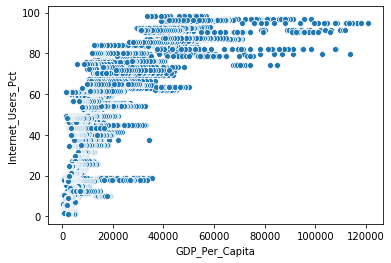

In [72]:
sns.scatterplot(x="GDP_Per_Capita",
                    y="Internet_Users_Pct",
                    data=gdp_and_internet_use_merged_2014)